# Task 1: Exploratory Data Analysis (EDA)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Load the dataset
df = pd.read_csv(r"D:\Excelr\Assignments\PCA\wine.csv")
print(df.info())
print(df.describe())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None
             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  17

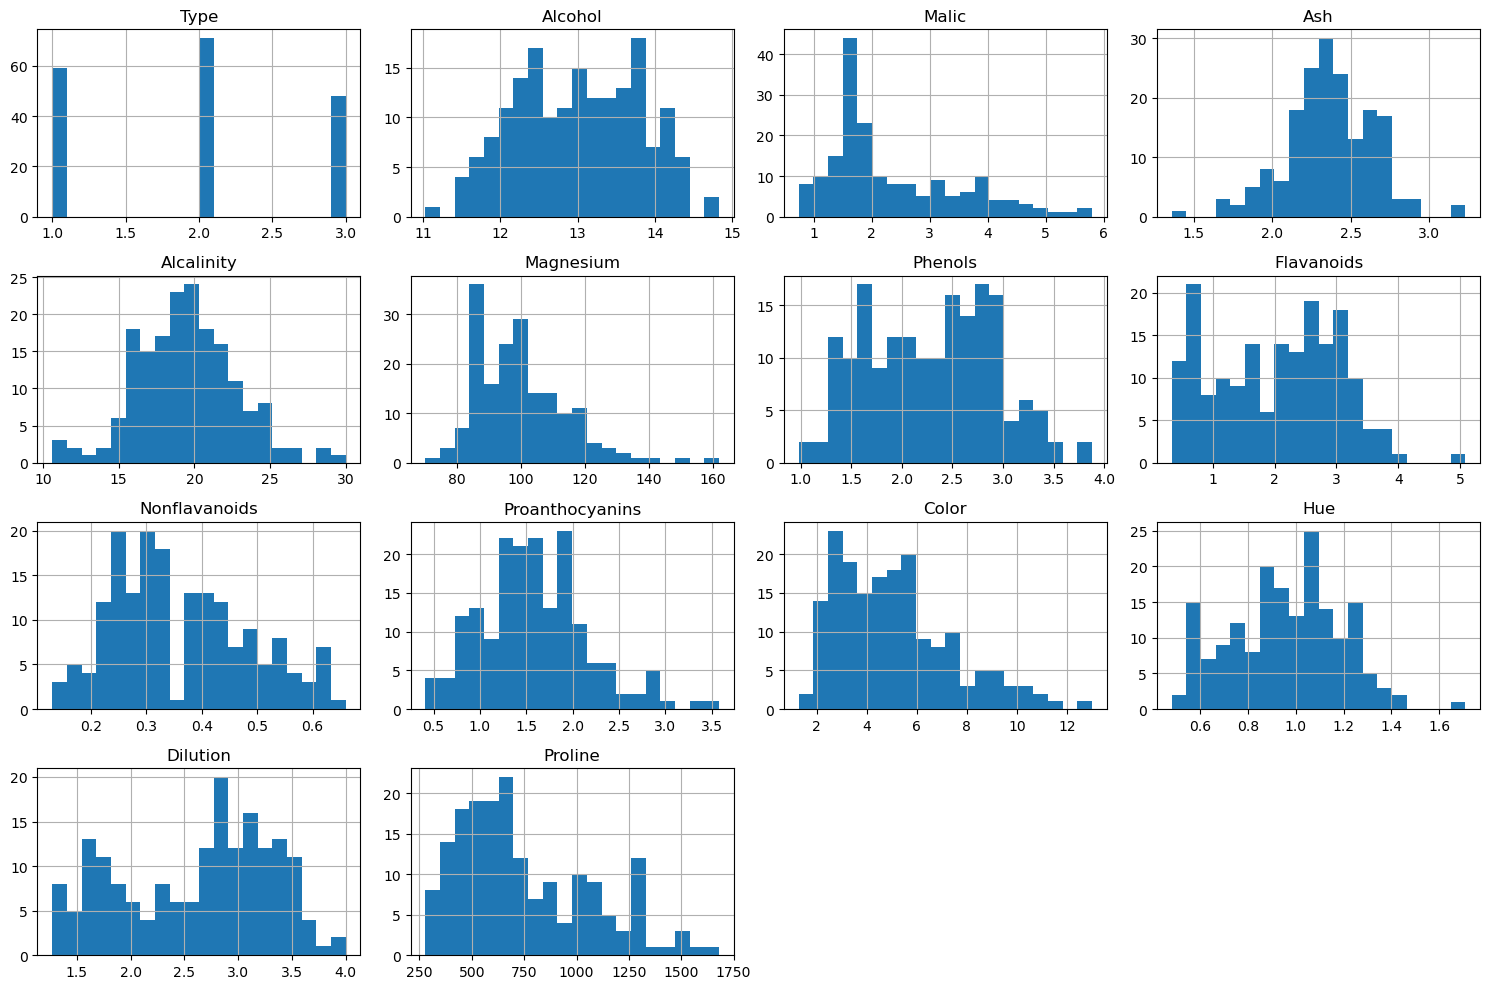

In [4]:
# Histograms
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

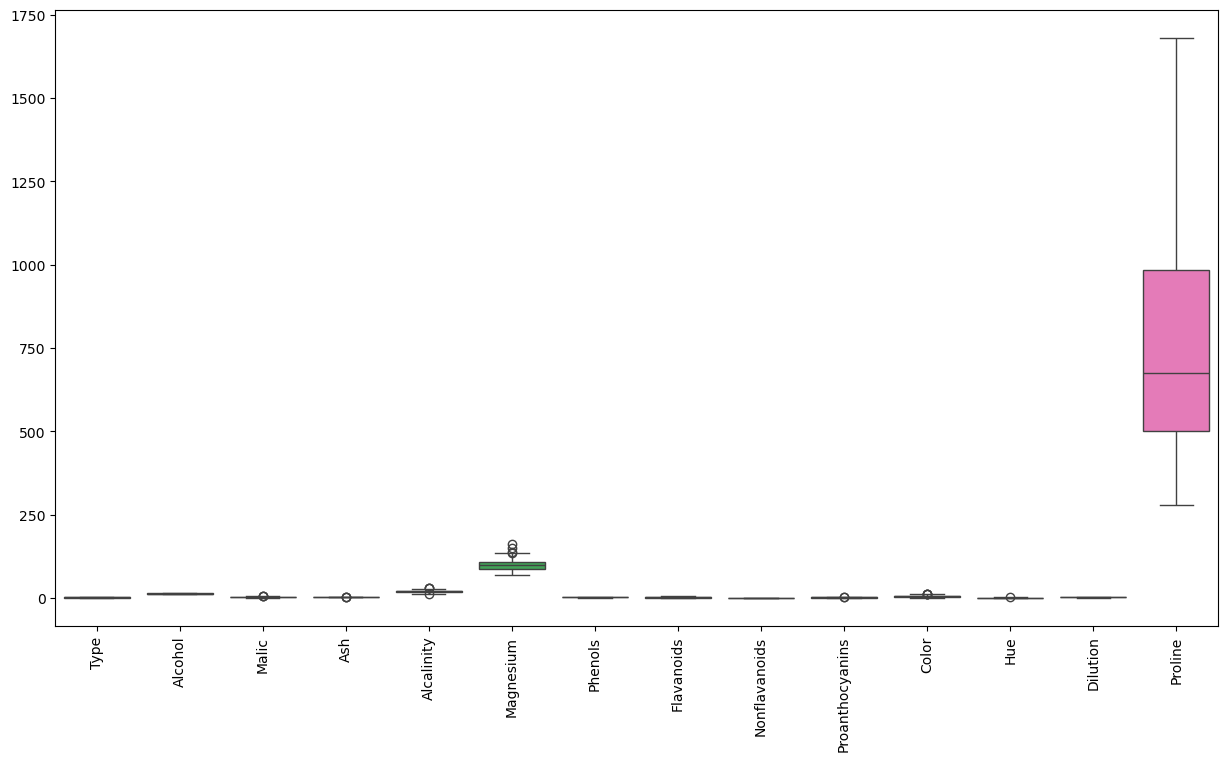

In [6]:
# Boxplots
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


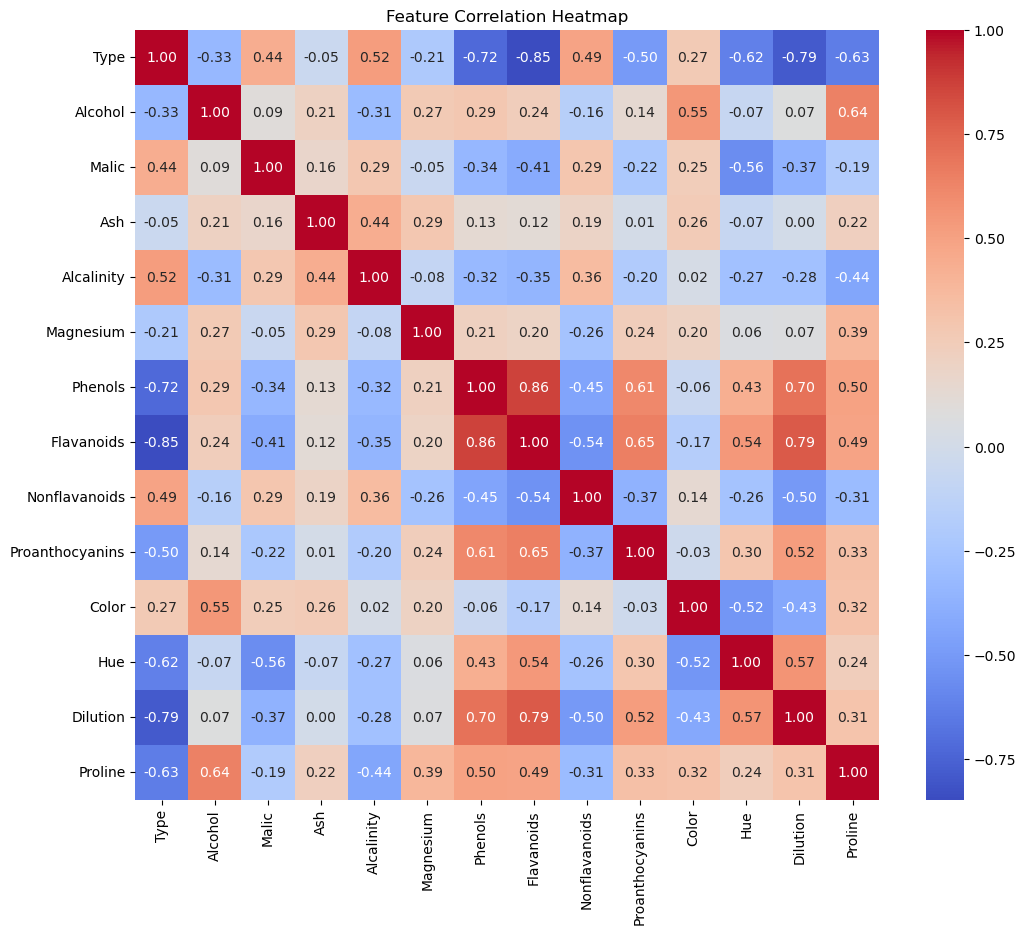

In [8]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Task 2: Dimensionality Reduction with PCA

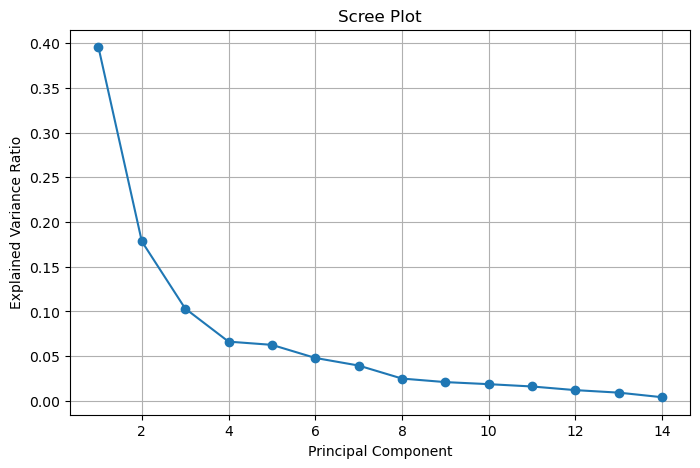

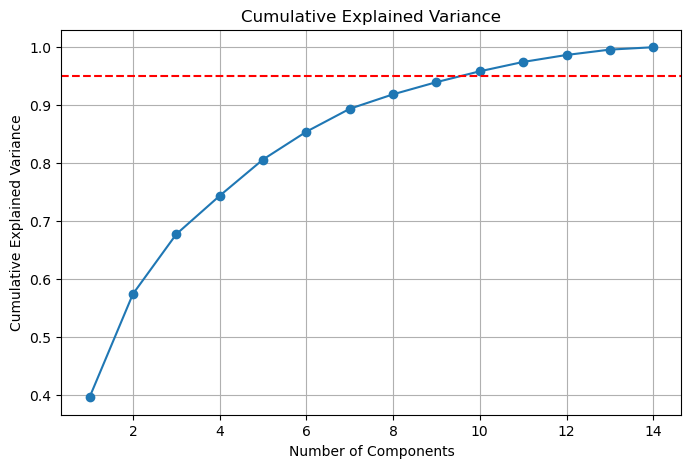

In [11]:
# Standardize features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Apply PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()

# Cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

# Choose components explaining ~95% variance
pca_95 = PCA(n_components=0.95)
pca_data_95 = pca_95.fit_transform(scaled_data)


# Task 3: Clustering with Original Data

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


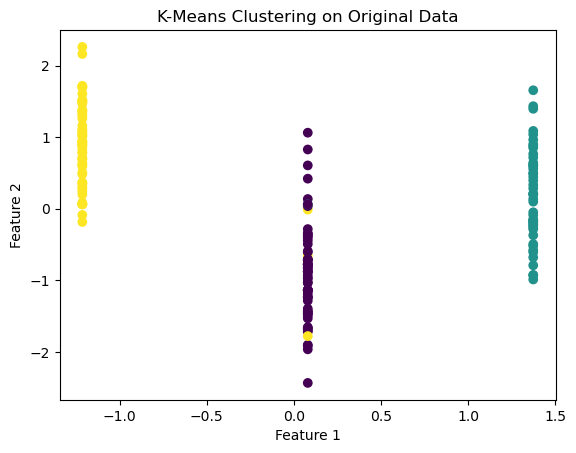

Original Data - Silhouette Score: 0.30648398324833453
Original Data - Davies-Bouldin Index: 1.315707552261773


In [14]:
# Apply KMeans
kmeans_orig = KMeans(n_clusters=3, random_state=42)
labels_orig = kmeans_orig.fit_predict(scaled_data)

# Visualize in 2D using first 2 features
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels_orig, cmap='viridis')
plt.title("K-Means Clustering on Original Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Evaluate clustering
print("Original Data - Silhouette Score:", silhouette_score(scaled_data, labels_orig))
print("Original Data - Davies-Bouldin Index:", davies_bouldin_score(scaled_data, labels_orig))


# Task 4: Clustering with PCA Data

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


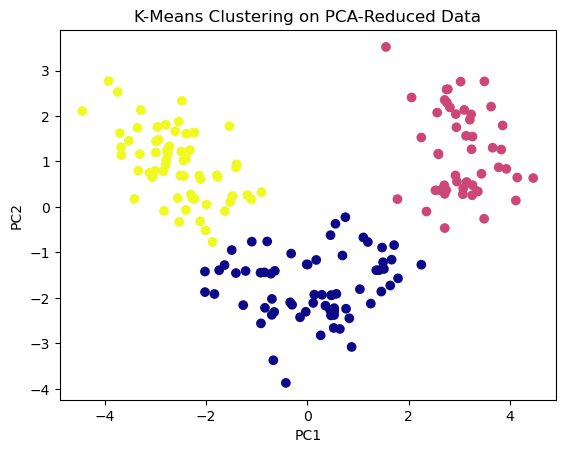

PCA Data - Silhouette Score: 0.32292055407233
PCA Data - Davies-Bouldin Index: 1.2578453408449175


In [17]:
# Apply KMeans on PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(pca_data_95)

# Visualize in 2D using first 2 PCs
plt.scatter(pca_data_95[:, 0], pca_data_95[:, 1], c=labels_pca, cmap='plasma')
plt.title("K-Means Clustering on PCA-Reduced Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# Evaluate clustering
print("PCA Data - Silhouette Score:", silhouette_score(pca_data_95, labels_pca))
print("PCA Data - Davies-Bouldin Index:", davies_bouldin_score(pca_data_95, labels_pca))


# Task 5: Comparison and Analysis

In [20]:
# Compare Silhouette & DB Index
print("Silhouette Score - Original:", silhouette_score(scaled_data, labels_orig))
print("Silhouette Score - PCA:", silhouette_score(pca_data_95, labels_pca))
print("DB Index - Original:", davies_bouldin_score(scaled_data, labels_orig))
print("DB Index - PCA:", davies_bouldin_score(pca_data_95, labels_pca))


Silhouette Score - Original: 0.30648398324833453
Silhouette Score - PCA: 0.32292055407233
DB Index - Original: 1.315707552261773
DB Index - PCA: 1.2578453408449175


# Task 6: Conclusion and Insights

###  Summary
- The original dataset has high correlation among some features.
- PCA reduced the dimensions while preserving ~95% of the variance.
- K-Means clustering worked on both original and PCA data, with slightly better performance on PCA-transformed data.

###  Practical Implications
- PCA is beneficial when dealing with high-dimensional or correlated data.
- Clustering on PCA-transformed data can yield more distinct clusters.

###  Recommendations
Use PCA before clustering when:
- Dimensionality is high
- Features are correlated
- You want to speed up computation